# SYRIATEL CUSTOMER CHURN ANALYSIS


## Project overview

This project applies classification algorithms to predict customer churn based on usage patterns from a dataset with 20 features and 3,333 records. Of these, 483 are churners and 2,850 are non-churners. The target variable is categorical ('churn'), and model performance is evaluated using recall.

# Business understanding

Customer churn is a major challenge for telecom companies, affecting revenue and growth. Syriatel, a leading telecom provider in Syria, recognizes that retaining customers is more cost-effective than acquiring new ones. This project builds a machine learning model to predict which customers are likely to churn and identifies key factors behind it. The goal is to help Syriatel take proactive steps to reduce churn and boost customer loyalty.

 #Research-Oriented

- To build a machine learning model that can accurately predict customers  who will churn based on the information available in the dataset.<br>
- To identify the features that are important for predicting customer churn.

Importing necessary libraries

In [221]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

%matplotlib inline

In [222]:
df = pd.read_csv('/Users/chebet/Desktop/FINAL _PROJECT _PHASE/telecom_churn_data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#An overview of the shape of the dataset

In [223]:
df.shape

(3333, 21)

#checking of columns of the dataset

In [224]:

df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

#Viewing of info Summary of the data

In [225]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset has both categorical and continuous features. 

#Getting basic statistics summary

In [226]:

df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Cleaning

In [227]:
# Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There must be a one-to-one relationship between customers and phone numbers—no duplicates permitted.

In [228]:
# check for duplicates using the phone number
df.duplicated(subset='phone number').value_counts()

False    3333
Name: count, dtype: int64

The dataframe has no duplicates and no missing values.

In [229]:
# area code data type
df['area code'].dtype

dtype('int64')

Since no mathematical operations are needed on the area code, it’s best treated as a categorical (object) data type.

In [230]:
# convert area code from integer to string
df['area code'] = df['area code'].astype(object)
df['area code'].dtype

dtype('O')

# Exploratory data analysis

# Univariate anaysis

Visualize how churn is distributed, as it represents the target variable for this classification problem.

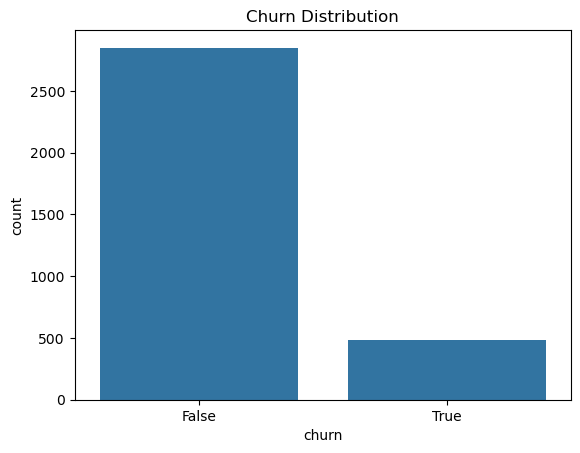

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


In [231]:
# Count plot of Churn
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Percentages
churn_pct = df['churn'].value_counts(normalize=True) * 100
print(churn_pct)


The target variable is imbalanced, with 85.51% of observations labeled as False and only 14.49% as True.

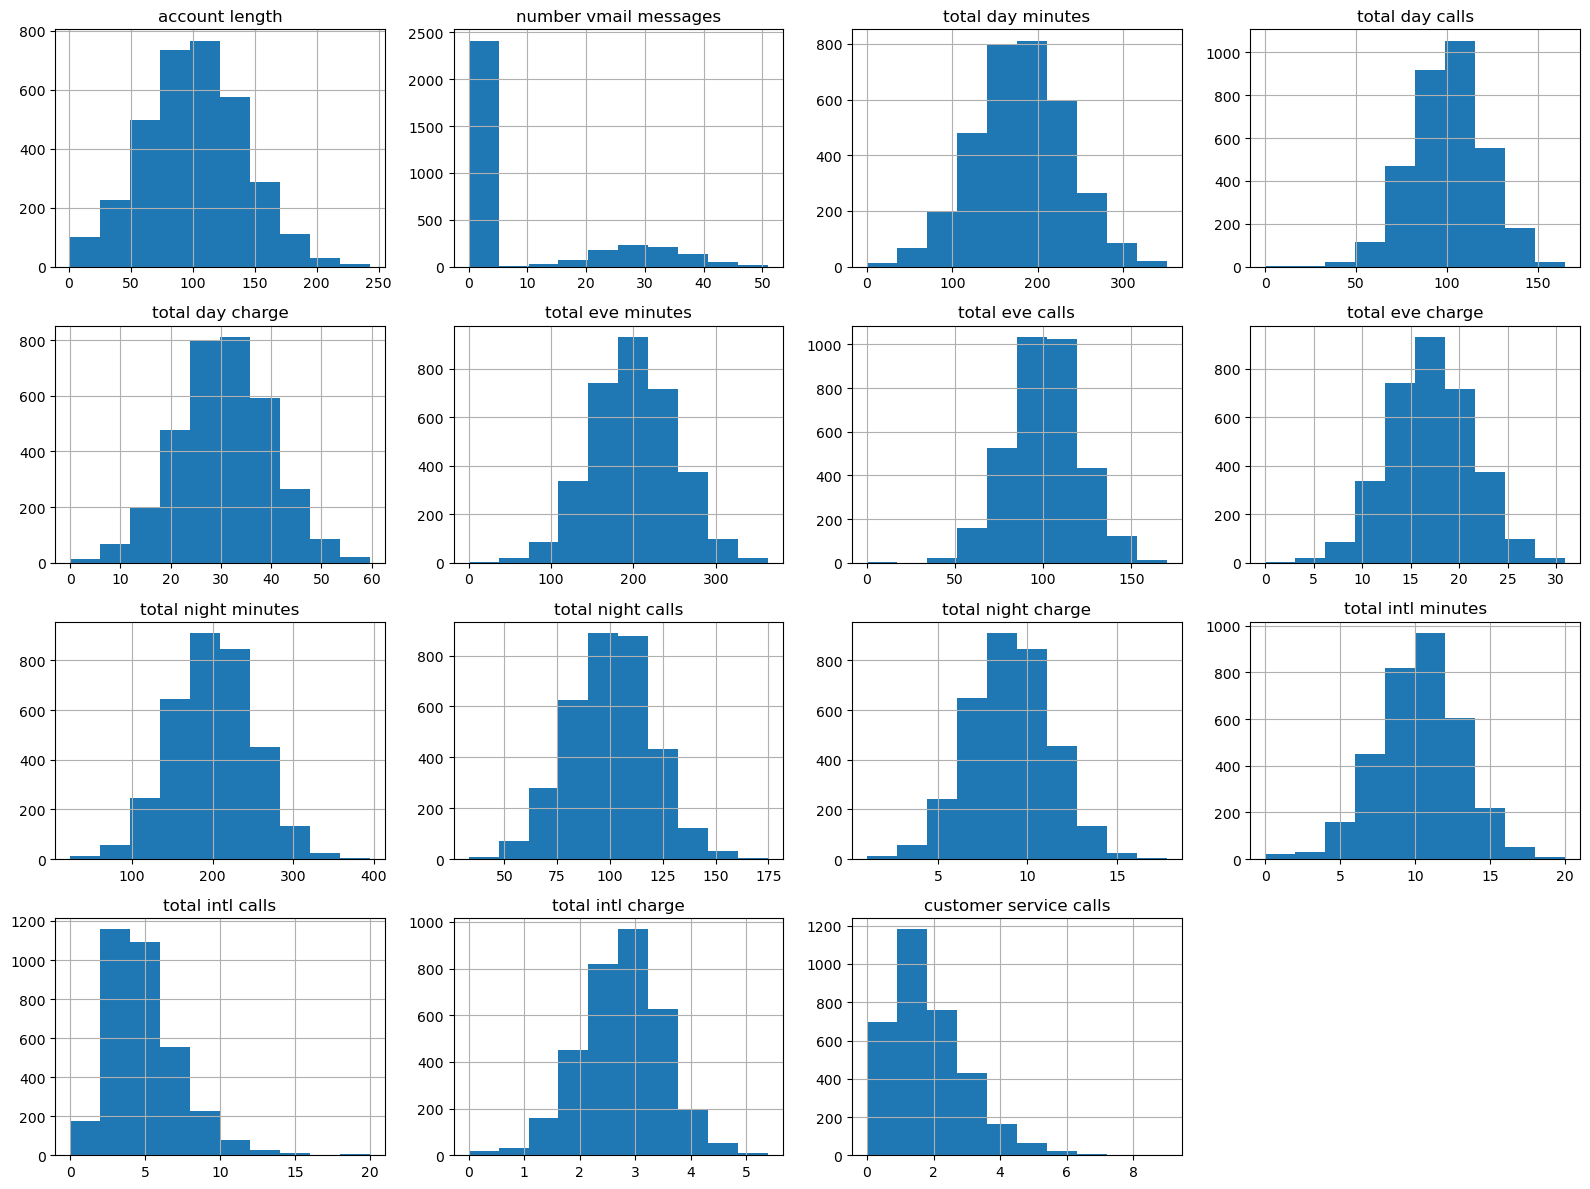

In [232]:
# distribution of features
numeric_cols = df.drop(columns='churn').select_dtypes(include='number')
numeric_cols.hist(figsize=(16,12))
plt.tight_layout()
plt.show()

The features vary in scale, and some are not normally distributed, so scaling and normalization are necessary.

In [233]:
# unique values of categorical features
categorical_cols = df.drop('phone number', axis=1).select_dtypes(include='object').columns
for col in categorical_cols:
    print(col.upper())
    print(df[col].unique())
    print('******************************************************* \n')

STATE
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
******************************************************* 

AREA CODE
[415 408 510]
******************************************************* 

INTERNATIONAL PLAN
['no' 'yes']
******************************************************* 

VOICE MAIL PLAN
['yes' 'no']
******************************************************* 



### Multivariate analysis


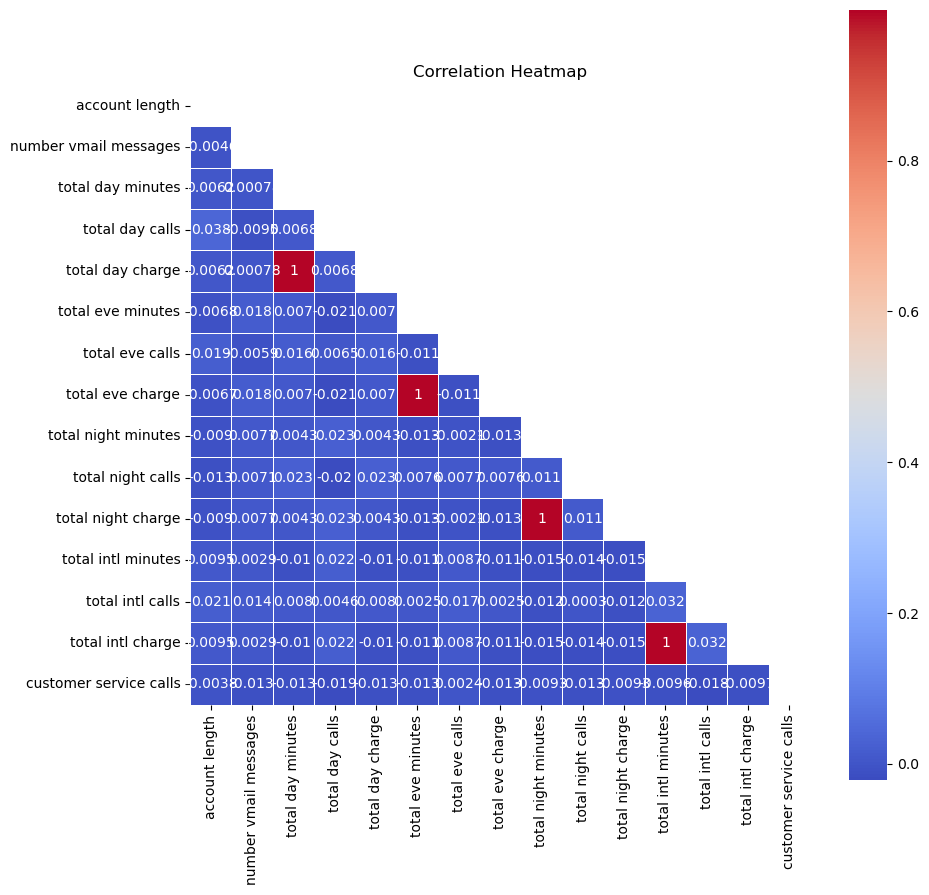

In [243]:
fig, ax = plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(numeric_cols.corr(), dtype=bool))
sns.heatmap(numeric_cols.corr(), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Most features show very weak or no correlation with each other.

There is, however, a perfect positive correlation between the following pairs: total evening charge and total evening minutes, total day charge and total day minutes, total night charge and total night minutes, and total international charge and total international minutes. 

This is expected, as call charges are directly proportional to call duration. To address multicollinearity, one variable from each highly correlated pair should be removed.

Total day minutes, total day charge, and customer service calls exhibit a weak positive correlation with churn.

All other features have negligible or near-zero correlation with churn.

# Data preparation for Machine Learning

In [235]:
# Compute correlation matrix (numeric only)
corr_matrix =numeric_cols.corr().abs()

# Unstack to long format
corr_pairs = corr_matrix.unstack().reset_index()

# Rename columns
corr_pairs.columns = ['feature_1', 'feature_2', 'cc']

# Remove self-pairs
corr_pairs = corr_pairs[corr_pairs['feature_1'] != corr_pairs['feature_2']]

# Sort features alphabetically to drop duplicates like A-B and B-A
corr_pairs['pairs'] = corr_pairs.apply(lambda row: tuple(sorted([row['feature_1'], row['feature_2']])), axis=1)
corr_pairs = corr_pairs.drop_duplicates('pairs')

# Filter for high collinearity (e.g., cc > 0.75)
high_corr = corr_pairs[corr_pairs['cc'] > 0.75]

# Display result
high_corr[['pairs', 'cc']].sort_values(by='cc', ascending=False)


,pairs,cc
34,"(total day charge, total day minutes)",1.000000
82,"(total eve charge, total eve minutes)",1.000000
130,"(total night charge, total night minutes)",0.999999
178,"(total intl charge, total intl minutes)",0.999993


In [236]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Dropped one variable from each pair of strongly correlated features.


# Train-test split

In [237]:
#select predictor and target variables
y = df['churn']
X = df.drop(columns=['churn', 'phone number'])

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =43)

In [238]:
# preview of X_train
X_train.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
943,OR,132,510,no,no,0,191.9,107,32.62,206.9,127,17.59,272.0,88,12.24,12.6,2,3.40,1
773,MA,127,408,yes,no,0,176.9,110,30.07,167.9,100,14.27,182.2,138,8.20,7.7,2,2.08,1
533,OK,125,415,no,yes,36,201.3,117,34.22,42.2,78,3.59,125.7,104,5.66,5.4,3,1.46,1
1595,NJ,83,415,no,no,0,178.8,102,30.40,167.9,84,14.27,178.9,65,8.05,8.6,4,2.32,3
1202,MO,86,415,no,no,0,83.5,96,14.20,221.1,63,18.79,349.7,75,15.74,12.6,3,3.40,0


# Transform categorical variables

In [239]:
# Creating dummy variables for the categorical columns
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
943,132,0,191.9,107,32.62,206.9,127,17.59,272.0,88,...,False,False,False,False,False,False,False,True,False,False
773,127,0,176.9,110,30.07,167.9,100,14.27,182.2,138,...,False,False,False,False,False,False,False,False,True,False
533,125,36,201.3,117,34.22,42.2,78,3.59,125.7,104,...,False,False,False,False,False,False,True,False,False,True
1595,83,0,178.8,102,30.40,167.9,84,14.27,178.9,65,...,False,False,False,False,False,False,True,False,False,False
1202,86,0,83.5,96,14.20,221.1,63,18.79,349.7,75,...,False,False,False,False,False,False,True,False,False,False


# SMOTE

SMOTE is a technique used to resolve class imbalance by synthetically increasing the number of minority class instances through interpolation.
To balance the dataset, SMOTE oversamples the minority class by generating artificial data points based on existing ones.

In [240]:
# Fit SMOTE to training data
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts()) 

churn
False    2264
True     2264
Name: count, dtype: int64


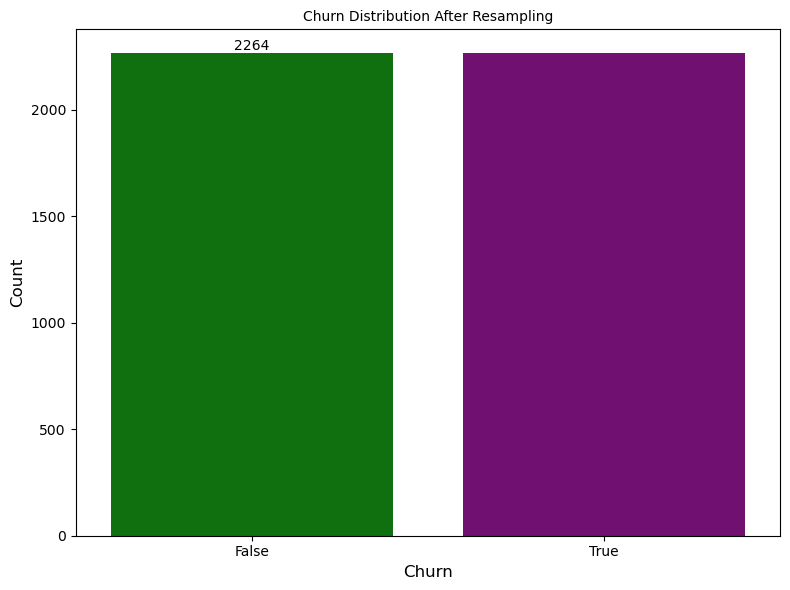

In [241]:
# Bar chart of class distribution
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x=y_train_resampled, hue=y_train_resampled, palette=['green', 'purple'], ax=ax, legend=False)
ax.set_xlabel('Churn', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Churn Distribution After Resampling', fontsize=10)
ax.bar_label(ax.containers[0], fmt='%.0f')  # Add count labels on bars
plt.tight_layout()
plt.show()


In [242]:
# SMOTE not applied to test data
y_test.value_counts()

churn
False    586
True      81
Name: count, dtype: int64

Distribution of the churn classes is now balanced.SMOTE is used to balance the training data only. The test data is left unaltered to provide a fair and realistic evaluation of the model.